# Concept Mapping using Fuzzy matching

## Define base directory

In [1]:
baseDir = '/superbugai-data/yash/temp'

## Read Concept Names

In [2]:
import pandas as pd

conceptsDf = pd.read_csv(baseDir + '/' + 'concept_names.txt', sep='\t')
conceptsDf

,concept_name,concept_code,source_concept_id,source_vocabulary_id,source_domain_id,source_concept_class_id,target_concept_id,relationship_id,reverese_relationship_id,concept_name_con,domain_id,vocab_id,concept_class_id,standard
0,Emergency Department,Emergency Department,2000001901,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,Emergency Room - Hospital,Visit,CMS Place of Service,Visit,S
1,Medicine,Medicine,2000001902,mimiciv_cs_place_of_service,Visit,Visit,38004515,Maps to,Mapped from,Hospital,Visit,Medicare Specialty,Visit,S
2,Emergency Department Observation,Emergency Department Observation,2000001903,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,Emergency Room - Hospital,Visit,CMS Place of Service,Visit,S
3,Nursery - Well Babies,Nursery - Well Babies,2000001904,mimiciv_cs_place_of_service,Visit,Visit,4160140,Maps to,Mapped from,Newborn nursery unit,Observation,SNOMED,Location,S
4,Medicine/Cardiology,Medicine/Cardiology,2000001905,mimiciv_cs_place_of_service,Visit,Visit,581383,Maps to,Mapped from,Inpatient Cardiac Care Facility,Visit,CMS Place of Service,Visit,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,NMED,NMED,2000001864,mimiciv_vis_service,Visit,Visit,4150070,Maps to,Mapped from,Neurology department,Observation,SNOMED,Location,S
3838,VSURG,VSURG,2000001865,mimiciv_vis_service,Visit,Visit,4150086,Maps to,Mapped from,Vascular surgery department,Observation,SNOMED,Location,S
3839,PSURG,PSURG,2000001866,mimiciv_vis_service,Visit,Visit,4150085,Maps to,Mapped from,Plastic surgery department,Observation,SNOMED,Location,S
3840,TSURG,TSURG,2000001867,mimiciv_vis_service,Observation,Location,4148989,Maps to,Mapped from,Thoracic surgery department,Observation,SNOMED,Location,S


## Read SNOMED vocabulary

In [3]:
import pandas as pd

tempDir = '/superbugai-data/yash/temp'
snomedDf = pd.read_csv(tempDir + '/preprocessed_snomed.csv')
snomedDf = snomedDf[snomedDf.name_status == 'P']

In [4]:
snomedDf

,cui,name,name_status,ontologies,description_type_ids,type_ids
0,10000006,Radiating chest pain (finding),P,SNOMED-CT,finding,67667581
1,1000001000168107,"Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet, ...",P,SNOMED-CT,containered trade product pack,19443049
2,100001000032107,Mass of left side of middle abdomen (finding),P,SNOMED-CT,finding,67667581
3,1000011000168105,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,NaN,72706784
4,1000021000168103,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,trade product pack,44751718
...,...,...,...,...,...,...
507707,999951000168105,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,trade product pack,44751718
507708,999961000168107,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,containered trade product pack,19443049
507709,999971000168101,Pantoprazole Heartburn Relief (Apohealth) (tra...,P,SNOMED-CT,trade product,99637394
507710,999981000168103,Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet (...,P,SNOMED-CT,NaN,72706784


## Define a function to perform fuzzy mapping

In [32]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def performFuzzyMatching(conceptId, conceptName, conceptVocabularyId):
    matchingConcept = process.extract(conceptName,  snomedDf.name, limit=1, scorer=fuzz.token_sort_ratio)
    return conceptId, conceptName, conceptVocabularyId, matchingConcept

/home/yram0006/phd/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Invoke Fuzzy mapping function in multithreaded mode

In [43]:
conceptsDf.source_vocabulary_id.value_counts()

mimiciv_drug_ndc                  1400
mimiciv_obs_drgcodes               916
mimiciv_micro_organism             364
mimiciv_meas_lab_loinc             251
mimiciv_meas_chart                 169
mimiciv_proc_datetimeevents        129
mimiciv_proc_itemid                113
mimiciv_drug_route                  96
mimiciv_micro_specimen              85
mimiciv_meas_unit                   54
mimiciv_meas_wf                     44
mimiciv_vis_admission_location      43
mimiciv_micro_microtest             34
mimiciv_meas_chartevents_value      29
mimiciv_micro_antibiotic            29
mimiciv_vis_service                 19
mimiciv_vis_discharge_location      13
mimiciv_mimic_generated             12
mimiciv_vis_admission_type           9
mimiciv_per_ethnicity                8
mimiciv_obs_marital                  7
mimiciv_obs_insurance                5
mimiciv_cs_place_of_service          5
mimiciv_micro_resistance             4
mimiciv_meas_wf_unit                 3
mimiciv_obs_language     

In [54]:
from multiprocessing import Pool
matchingOutputFuzzy = []
with Pool(15) as p:
    for concept in ['mimiciv_micro_organism', 'mimiciv_drug_route', 'mimiciv_cs_place_of_service']:
        matchingOutputFuzzy.append(
                p.starmap(
                performFuzzyMatching
                , zip(
                    conceptsDf[conceptsDf.source_vocabulary_id == concept][:12].source_concept_id
                    , conceptsDf[conceptsDf.source_vocabulary_id == concept][:12].concept_name
                    , conceptsDf[conceptsDf.source_vocabulary_id == concept][:12].source_vocabulary_id
                    )
            )
        )

In [59]:
matchingOutputFuzzyDf = pd.DataFrame(matchingOutputFuzzy[0])
matchingOutputFuzzyDf

,0,1,2,3
0,2000026001,ESCHERICHIA COLI,mimiciv_micro_organism,"[(Escherichia coli (organism), 78, 24770)]"
1,2000026002,GRAM NEGATIVE COCCI,mimiciv_micro_organism,"[(Gram-negative coccus (organism), 75, 126775)]"
2,2000026003,KLEBSIELLA PNEUMONIAE,mimiciv_micro_organism,"[(Klebsiella pneumoniae (organism), 82, 350872)]"
3,2000026004,KLEBSIELLA OXYTOCA,mimiciv_micro_organism,"[(Klebsiella oxytoca (organism), 80, 283187)]"
4,2000026005,KLEBSIELLA OZAENAE,mimiciv_micro_organism,"[(Klebsiella oxytoca (organism), 67, 283187)]"
5,2000026006,ENTEROBACTER AEROGENES,mimiciv_micro_organism,"[(Enterobacter cancerogenus (organism), 75, 29..."
6,2000026007,ENTEROBACTER CLOACAE,mimiciv_micro_organism,"[(Enterobacter cloacae (organism), 82, 88005)]"
7,2000026008,HAFNIA ALVEI,mimiciv_micro_organism,"[(Hafnia alvei (organism), 73, 429337)]"
8,2000026009,ENTEROBACTER AGGLOMERANS,mimiciv_micro_organism,"[(Genus Petrobacter (organism), 64, 309228)]"
9,2000026010,ENTEROBACTER GERGOVIAE,mimiciv_micro_organism,"[(Genus Enterobacter (organism), 73, 354453)]"


## Save results in a file

In [1]:
import pandas as pd

tempDir = '/superbugai-data/yash/temp'
matchingConceptsDf = pd.read_csv(tempDir + '/mapped_concept_names_fuzzy.csv')

## Read the results file

In [3]:
import pandas as pd

baseDir = '/superbugai-data/yash/temp'
mappedConceptsFuzzyDf = pd.read_csv(baseDir + '/' + 'mapped_concept_names_fuzzy_1.csv')

In [5]:
conceptsDf = pd.read_csv(baseDir + '/' + 'concept_names.txt', sep='\t')
conceptsDf

,concept_name,concept_code,source_concept_id,source_vocabulary_id,source_domain_id,source_concept_class_id,target_concept_id,relationship_id,reverese_relationship_id,concept_name_con,domain_id,vocab_id,concept_class_id,standard
0,Emergency Department,Emergency Department,2000001901,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,Emergency Room - Hospital,Visit,CMS Place of Service,Visit,S
1,Medicine,Medicine,2000001902,mimiciv_cs_place_of_service,Visit,Visit,38004515,Maps to,Mapped from,Hospital,Visit,Medicare Specialty,Visit,S
2,Emergency Department Observation,Emergency Department Observation,2000001903,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,Emergency Room - Hospital,Visit,CMS Place of Service,Visit,S
3,Nursery - Well Babies,Nursery - Well Babies,2000001904,mimiciv_cs_place_of_service,Visit,Visit,4160140,Maps to,Mapped from,Newborn nursery unit,Observation,SNOMED,Location,S
4,Medicine/Cardiology,Medicine/Cardiology,2000001905,mimiciv_cs_place_of_service,Visit,Visit,581383,Maps to,Mapped from,Inpatient Cardiac Care Facility,Visit,CMS Place of Service,Visit,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,NMED,NMED,2000001864,mimiciv_vis_service,Visit,Visit,4150070,Maps to,Mapped from,Neurology department,Observation,SNOMED,Location,S
3838,VSURG,VSURG,2000001865,mimiciv_vis_service,Visit,Visit,4150086,Maps to,Mapped from,Vascular surgery department,Observation,SNOMED,Location,S
3839,PSURG,PSURG,2000001866,mimiciv_vis_service,Visit,Visit,4150085,Maps to,Mapped from,Plastic surgery department,Observation,SNOMED,Location,S
3840,TSURG,TSURG,2000001867,mimiciv_vis_service,Observation,Location,4148989,Maps to,Mapped from,Thoracic surgery department,Observation,SNOMED,Location,S


In [6]:
conceptsDf[conceptsDf.vocab_id == 'SNOMED']

,concept_name,concept_code,source_concept_id,source_vocabulary_id,source_domain_id,source_concept_class_id,target_concept_id,relationship_id,reverese_relationship_id,concept_name_con,domain_id,vocab_id,concept_class_id,standard
3,Nursery - Well Babies,Nursery - Well Babies,2000001904,mimiciv_cs_place_of_service,Visit,Visit,4160140,Maps to,Mapped from,Newborn nursery unit,Observation,SNOMED,Location,S
497,IV,IV,2000002001,mimiciv_drug_route,Route,Qualifier Value,4171047,Maps to,Mapped from,Intravenous route,Route,SNOMED,Qualifier Value,S
1410,PO/NG,PO/NG,2000002002,mimiciv_drug_route,Route,Qualifier Value,4167540,Maps to,Mapped from,Enteral route,Route,SNOMED,Qualifier Value,S
1411,PO,PO,2000002003,mimiciv_drug_route,Route,Qualifier Value,4132161,Maps to,Mapped from,Oral route,Route,SNOMED,Qualifier Value,S
1412,SC,SC,2000002004,mimiciv_drug_route,Route,Qualifier Value,4142048,Maps to,Mapped from,Subcutaneous route,Route,SNOMED,Qualifier Value,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,NMED,NMED,2000001864,mimiciv_vis_service,Visit,Visit,4150070,Maps to,Mapped from,Neurology department,Observation,SNOMED,Location,S
3838,VSURG,VSURG,2000001865,mimiciv_vis_service,Visit,Visit,4150086,Maps to,Mapped from,Vascular surgery department,Observation,SNOMED,Location,S
3839,PSURG,PSURG,2000001866,mimiciv_vis_service,Visit,Visit,4150085,Maps to,Mapped from,Plastic surgery department,Observation,SNOMED,Location,S
3840,TSURG,TSURG,2000001867,mimiciv_vis_service,Observation,Location,4148989,Maps to,Mapped from,Thoracic surgery department,Observation,SNOMED,Location,S


In [5]:
mappedConceptsFuzzyDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"[('Genetics department (environment)', 71, 230..."
1,2000001902,Medicine,mimiciv_cs_place_of_service,"[('Merodicein (substance)', 57, 197790)]"
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,[('Emergency department physician (occupation)...
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"[('Well nourished (finding)', 59, 172636)]"
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"[('Cardiology service (procedure)', 68, 230258)]"
...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"[('Verdin (organism)', 42, 90892)]"
3838,2000001865,VSURG,mimiciv_vis_service,"[('Causus (organism)', 40, 326208)]"
3839,2000001866,PSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]"
3840,2000001867,TSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]"


In [6]:
import ast

mappedConceptsFuzzyDf["matching_concept"]\
    .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
    .apply(lambda matchingConceptlist: len(matchingConceptlist))\
    .value_counts()

1    3842
Name: matching_concept, dtype: int64

In [7]:
import ast

mappedConceptsFuzzyDf["Mapped Concept Fuzzy"] = mappedConceptsFuzzyDf["matching_concept"]\
                                            .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
                                            .apply(lambda matchingConceptList: matchingConceptList[0][0])
mappedConceptsFuzzyDf["Mapped ID Fuzzy"] = mappedConceptsFuzzyDf["matching_concept"]\
                                            .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
                                            .apply(lambda matchingConceptList: matchingConceptList[0][2])
mappedConceptsFuzzyDf["Mapped Score Fuzzy"] = mappedConceptsFuzzyDf["matching_concept"]\
                                            .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
                                            .apply(lambda matchingConceptList: matchingConceptList[0][1])
mappedConceptsFuzzyDf = mappedConceptsFuzzyDf[mappedConceptsFuzzyDf['concept_name'].notna()]
mappedConceptsFuzzyDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Score Fuzzy
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"[('Genetics department (environment)', 71, 230...",Genetics department (environment),230127,71
1,2000001902,Medicine,mimiciv_cs_place_of_service,"[('Merodicein (substance)', 57, 197790)]",Merodicein (substance),197790,57
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,[('Emergency department physician (occupation)...,Emergency department physician (occupation),229560,74
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"[('Well nourished (finding)', 59, 172636)]",Well nourished (finding),172636,59
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"[('Cardiology service (procedure)', 68, 230258)]",Cardiology service (procedure),230258,68
...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"[('Verdin (organism)', 42, 90892)]",Verdin (organism),90892,42
3838,2000001865,VSURG,mimiciv_vis_service,"[('Causus (organism)', 40, 326208)]",Causus (organism),326208,40
3839,2000001866,PSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]",Surgeon (occupation),224480,43
3840,2000001867,TSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]",Surgeon (occupation),224480,43


In [11]:
import pandas as pd

mergedDf = pd.merge(mappedConceptsFuzzyDf, snomedDf, left_on='Mapped Concept Fuzzy', right_on='name')
mergedDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Score Fuzzy,cui,name,name_status,ontologies,description_type_ids,type_ids
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"[('Genetics department (environment)', 71, 230...",Genetics department (environment),230127,71,309928004,Genetics department (environment),P,SNOMED-CT,environment,75168589
1,2000001902,Medicine,mimiciv_cs_place_of_service,"[('Merodicein (substance)', 57, 197790)]",Merodicein (substance),197790,57,27730007,Merodicein (substance),P,SNOMED-CT,substance,91187746
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,[('Emergency department physician (occupation)...,Emergency department physician (occupation),229560,74,309294001,Emergency department physician (occupation),P,SNOMED-CT,occupation,16939031
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"[('Well nourished (finding)', 59, 172636)]",Well nourished (finding),172636,59,248324001,Well nourished (finding),P,SNOMED-CT,finding,67667581
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"[('Cardiology service (procedure)', 68, 230258)]",Cardiology service (procedure),230258,68,310036006,Cardiology service (procedure),P,SNOMED-CT,procedure,28321150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,2000001865,VSURG,mimiciv_vis_service,"[('Causus (organism)', 40, 326208)]",Causus (organism),326208,40,45587005,Causus (organism),P,SNOMED-CT,organism,81102976
3838,2000001864,NMED,mimiciv_vis_service,"[('Verdin (organism)', 42, 90892)]",Verdin (organism),90892,42,1465001,Verdin (organism),P,SNOMED-CT,organism,81102976
3839,2000001866,PSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]",Surgeon (occupation),224480,43,304292004,Surgeon (occupation),P,SNOMED-CT,occupation,16939031
3840,2000001867,TSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]",Surgeon (occupation),224480,43,304292004,Surgeon (occupation),P,SNOMED-CT,occupation,16939031


In [12]:
mergedDf.ontologies.value_counts()

SNOMED-CT    3842
Name: ontologies, dtype: int64

In [13]:
mergedDf.description_type_ids.value_counts()

procedure                         644
substance                         627
disorder                          557
finding                           388
organism                          378
AU substance                      199
medicinal product                 105
trade product                      91
situation                          80
trade product pack                 63
attribute                          43
event                              42
medicinal product pack             42
person                             41
specimen                           40
occupation                         38
cell                               38
qualifier value                    29
observable entity                  28
environment                        24
physical object                    19
product                            18
dose form                          16
regime/therapy                     12
AU qualifier                       10
body structure                     10
role        

In [16]:
mergedDf[mergedDf['concept_name'].isin(['TISSUE', 'MRSA SCREEN', 'URINE CULTURE', 'WOUND CULTURE', 'RESPIRATORY CULTURE', 'AEROBIC BOTTLE', 'ANAEROBIC BOTTLE', 'URINE CULTURE', 'R/O VANCOMYCIN RESISTANT ENTEROCOCCUS', 'ANAEROBIC BOTTLE', 'AEROBIC BOTTLE', 'ANAEROBIC BOTTLE', 'FUNGAL CULTURE (HAIR/SKIN/NAILS)', 'YEAST VAGINITIS CULTURE', 'MRSA SCREEN', 'Blood Culture, Routine', 'Blood Culture, Neonate', 'C. difficile DNA amplification assay', 'C. difficile Toxin antigen assay', 'CAMPYLOBACTER CULTURE', 'ANAEROBIC CULTURE', 'OVA + PARASITES', 'VIRAL CULTURE', 'VIRAL CULTURE: R/O HERPES SIMPLEX VIRUS', 'AEROBIC BOTTLE', 'AEROBIC BOTTLE', 'ANAEROBIC BOTTLE', 'BLOOD/FUNGAL CULTURE', 'FECAL CULTURE', 'FLUID CULTURE', 'FUNGAL CULTURE', 'TISSUE', 'VIRAL CULTURE'])]

,concept_id,concept_name,concept_vocabulary_id,matching_concept,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Score Fuzzy,cui,name,name_status,ontologies,description_type_ids,type_ids
1588,2000028007,AEROBIC BOTTLE,mimiciv_micro_microtest,"[('Carrier oil (role)', 60, 464215)]",Carrier oil (role),464215,60,838457009,Carrier oil (role),P,SNOMED-CT,role,87776218
1589,2000028012,AEROBIC BOTTLE,mimiciv_micro_microtest,"[('Carrier oil (role)', 60, 464215)]",Carrier oil (role),464215,60,838457009,Carrier oil (role),P,SNOMED-CT,role,87776218
1590,2000028026,AEROBIC BOTTLE,mimiciv_micro_microtest,"[('Carrier oil (role)', 60, 464215)]",Carrier oil (role),464215,60,838457009,Carrier oil (role),P,SNOMED-CT,role,87776218
1591,2000028027,AEROBIC BOTTLE,mimiciv_micro_microtest,"[('Carrier oil (role)', 60, 464215)]",Carrier oil (role),464215,60,838457009,Carrier oil (role),P,SNOMED-CT,role,87776218
1928,2000028025,VIRAL CULTURE: R/O HERPES SIMPLEX VIRUS,mimiciv_micro_microtest,"[('Herpes simplex virus culture (procedure)', ...",Herpes simplex virus culture (procedure),54866,82,122213002,Herpes simplex virus culture (procedure),P,SNOMED-CT,procedure,28321150
2469,2000028017,"Blood Culture, Routine",mimiciv_micro_microtest,"[('Blood culture (procedure)', 82, 221178)]",Blood culture (procedure),221178,82,30088009,Blood culture (procedure),P,SNOMED-CT,procedure,28321150
2470,2000028018,"Blood Culture, Neonate",mimiciv_micro_microtest,"[('Blood culture (procedure)', 73, 221178)]",Blood culture (procedure),221178,73,30088009,Blood culture (procedure),P,SNOMED-CT,procedure,28321150
2510,2000025557,TISSUE,mimiciv_micro_specimen,"[('Pterins (substance)', 52, 145808)]",Pterins (substance),145808,52,22078005,Pterins (substance),P,SNOMED-CT,substance,91187746
2511,2000025560,TISSUE,mimiciv_micro_specimen,"[('Pterins (substance)', 52, 145808)]",Pterins (substance),145808,52,22078005,Pterins (substance),P,SNOMED-CT,substance,91187746
2512,2000025579,TISSUE,mimiciv_micro_specimen,"[('Pterins (substance)', 52, 145808)]",Pterins (substance),145808,52,22078005,Pterins (substance),P,SNOMED-CT,substance,91187746


In [17]:
mergedDf[mergedDf['concept_name'].isin(['ESCHERICHIA COLI', 'GRAM NEGATIVE COCCI', 'KLEBSIELLA PNEUMONIAE', 'KLEBSIELLA OXYTOCA', 'KLEBSIELLA OZAENAE', 'ENTEROBACTER AEROGENES', 'ENTEROBACTER CLOACAE', 'HAFNIA ALVEI', 'ENTEROBACTER AGGLOMERANS', 'ENTEROBACTER GERGOVIAE', 'CRONOBACTER (ENTEROBACTER) SAKAZAKII', 'SERRATIA LIQUEFACIENS', 'SERRATIA MARCESCENS', 'SERRATIA RUBIDAEA', 'PROTEUS VULGARIS', 'PROTEUS MIRABILIS', 'MORGANELLA MORGANII', 'PROVIDENCIA STUARTII', 'PROVIDENCIA RETTGERI', 'SHIGELLA FLEXNERI', 'SALMONELLA ENTERITIDIS'])]

,concept_id,concept_name,concept_vocabulary_id,matching_concept,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Score Fuzzy,cui,name,name_status,ontologies,description_type_ids,type_ids
1763,2000026001,ESCHERICHIA COLI,mimiciv_micro_organism,"[('Escherichia coli (organism)', 78, 24770)]",Escherichia coli (organism),24770,78,112283007,Escherichia coli (organism),P,SNOMED-CT,organism,81102976
1764,2000026002,GRAM NEGATIVE COCCI,mimiciv_micro_organism,"[('Gram-negative coccus (organism)', 75, 126775)]",Gram-negative coccus (organism),126775,75,18383003,Gram-negative coccus (organism),P,SNOMED-CT,organism,81102976
1765,2000026003,KLEBSIELLA PNEUMONIAE,mimiciv_micro_organism,"[('Klebsiella pneumoniae (organism)', 82, 3508...",Klebsiella pneumoniae (organism),350872,82,56415008,Klebsiella pneumoniae (organism),P,SNOMED-CT,organism,81102976
1767,2000026004,KLEBSIELLA OXYTOCA,mimiciv_micro_organism,"[('Klebsiella oxytoca (organism)', 80, 283187)]",Klebsiella oxytoca (organism),283187,80,40886007,Klebsiella oxytoca (organism),P,SNOMED-CT,organism,81102976
1768,2000026005,KLEBSIELLA OZAENAE,mimiciv_micro_organism,"[('Klebsiella oxytoca (organism)', 67, 283187)]",Klebsiella oxytoca (organism),283187,67,40886007,Klebsiella oxytoca (organism),P,SNOMED-CT,organism,81102976
1769,2000026006,ENTEROBACTER AEROGENES,mimiciv_micro_organism,"[('Enterobacter cancerogenus (organism)', 75, ...",Enterobacter cancerogenus (organism),29872,75,114451003,Enterobacter cancerogenus (organism),P,SNOMED-CT,organism,81102976
1770,2000026007,ENTEROBACTER CLOACAE,mimiciv_micro_organism,"[('Enterobacter cloacae (organism)', 82, 88005)]",Enterobacter cloacae (organism),88005,82,14385002,Enterobacter cloacae (organism),P,SNOMED-CT,organism,81102976
1771,2000026008,HAFNIA ALVEI,mimiciv_micro_organism,"[('Hafnia alvei (organism)', 73, 429337)]",Hafnia alvei (organism),429337,73,76694001,Hafnia alvei (organism),P,SNOMED-CT,organism,81102976
1772,2000026009,ENTEROBACTER AGGLOMERANS,mimiciv_micro_organism,"[('Genus Petrobacter (organism)', 64, 309228)]",Genus Petrobacter (organism),309228,64,434580001,Genus Petrobacter (organism),P,SNOMED-CT,organism,81102976
1773,2000026010,ENTEROBACTER GERGOVIAE,mimiciv_micro_organism,"[('Genus Enterobacter (organism)', 73, 354453)]",Genus Enterobacter (organism),354453,73,58683007,Genus Enterobacter (organism),P,SNOMED-CT,organism,81102976


<AxesSubplot:>

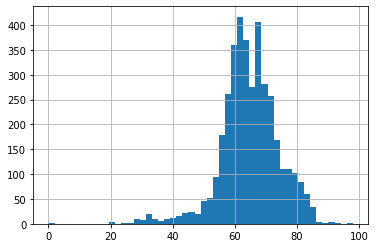

In [18]:
mergedDf['Mapped Score Fuzzy'].hist(bins=50)

In [20]:
mergedDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Score Fuzzy,cui,name,name_status,ontologies,description_type_ids,type_ids
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"[('Genetics department (environment)', 71, 230...",Genetics department (environment),230127,71,309928004,Genetics department (environment),P,SNOMED-CT,environment,75168589
1,2000001902,Medicine,mimiciv_cs_place_of_service,"[('Merodicein (substance)', 57, 197790)]",Merodicein (substance),197790,57,27730007,Merodicein (substance),P,SNOMED-CT,substance,91187746
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,[('Emergency department physician (occupation)...,Emergency department physician (occupation),229560,74,309294001,Emergency department physician (occupation),P,SNOMED-CT,occupation,16939031
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"[('Well nourished (finding)', 59, 172636)]",Well nourished (finding),172636,59,248324001,Well nourished (finding),P,SNOMED-CT,finding,67667581
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"[('Cardiology service (procedure)', 68, 230258)]",Cardiology service (procedure),230258,68,310036006,Cardiology service (procedure),P,SNOMED-CT,procedure,28321150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,2000001865,VSURG,mimiciv_vis_service,"[('Causus (organism)', 40, 326208)]",Causus (organism),326208,40,45587005,Causus (organism),P,SNOMED-CT,organism,81102976
3838,2000001864,NMED,mimiciv_vis_service,"[('Verdin (organism)', 42, 90892)]",Verdin (organism),90892,42,1465001,Verdin (organism),P,SNOMED-CT,organism,81102976
3839,2000001866,PSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]",Surgeon (occupation),224480,43,304292004,Surgeon (occupation),P,SNOMED-CT,occupation,16939031
3840,2000001867,TSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]",Surgeon (occupation),224480,43,304292004,Surgeon (occupation),P,SNOMED-CT,occupation,16939031


In [26]:
groupedDf = mergedDf\
    .groupby(['concept_vocabulary_id', 'description_type_ids'])\
        .agg(
                {
                    'concept_name':'count',
                }
            )\
                .reset_index()
groupedDf

,concept_vocabulary_id,description_type_ids,concept_name
0,mimiciv_cs_place_of_service,environment,1
1,mimiciv_cs_place_of_service,finding,1
2,mimiciv_cs_place_of_service,occupation,1
3,mimiciv_cs_place_of_service,procedure,1
4,mimiciv_cs_place_of_service,substance,1
...,...,...,...
245,mimiciv_vis_service,occupation,2
246,mimiciv_vis_service,organism,4
247,mimiciv_vis_service,procedure,2
248,mimiciv_vis_service,product,1


In [27]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_cs_place_of_service']

,concept_vocabulary_id,description_type_ids,concept_name
0,mimiciv_cs_place_of_service,environment,1
1,mimiciv_cs_place_of_service,finding,1
2,mimiciv_cs_place_of_service,occupation,1
3,mimiciv_cs_place_of_service,procedure,1
4,mimiciv_cs_place_of_service,substance,1


In [28]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_micro_organism']

,concept_vocabulary_id,description_type_ids,concept_name
121,mimiciv_micro_organism,cell,1
122,mimiciv_micro_organism,disorder,6
123,mimiciv_micro_organism,ethnic group,1
124,mimiciv_micro_organism,finding,16
125,mimiciv_micro_organism,organism,298
126,mimiciv_micro_organism,procedure,14
127,mimiciv_micro_organism,qualifier value,2
128,mimiciv_micro_organism,specimen,15
129,mimiciv_micro_organism,substance,11


In [31]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_drug_ndc']

,concept_vocabulary_id,description_type_ids,concept_name
5,mimiciv_drug_ndc,AU qualifier,10
6,mimiciv_drug_ndc,AU substance,199
7,mimiciv_drug_ndc,attribute,3
8,mimiciv_drug_ndc,basic dose form,1
9,mimiciv_drug_ndc,body structure,1
10,mimiciv_drug_ndc,clinical drug,3
11,mimiciv_drug_ndc,containered trade product pack,1
12,mimiciv_drug_ndc,disorder,14
13,mimiciv_drug_ndc,dose form,15
14,mimiciv_drug_ndc,environment,2


In [30]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_drug_route']

,concept_vocabulary_id,description_type_ids,concept_name
31,mimiciv_drug_route,attribute,1
32,mimiciv_drug_route,cell,5
33,mimiciv_drug_route,disorder,4
34,mimiciv_drug_route,event,16
35,mimiciv_drug_route,finding,16
36,mimiciv_drug_route,intended site,3
37,mimiciv_drug_route,occupation,1
38,mimiciv_drug_route,organism,12
39,mimiciv_drug_route,person,17
40,mimiciv_drug_route,physical object,1


In [32]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_proc_datetimeevents']

,concept_vocabulary_id,description_type_ids,concept_name
185,mimiciv_proc_datetimeevents,attribute,15
186,mimiciv_proc_datetimeevents,cell,1
187,mimiciv_proc_datetimeevents,disorder,6
188,mimiciv_proc_datetimeevents,event,2
189,mimiciv_proc_datetimeevents,finding,24
190,mimiciv_proc_datetimeevents,link assertion,1
191,mimiciv_proc_datetimeevents,occupation,2
192,mimiciv_proc_datetimeevents,organism,1
193,mimiciv_proc_datetimeevents,physical object,5
194,mimiciv_proc_datetimeevents,procedure,54
